![Alt text](https://sun9-48.userapi.com/c858236/v858236600/1b87ba/c5083w2n7eE.jpg)

### Svetlana Melikyan

# Name - Ethnicity Classifier 

#### Data

#####  For this exercise we will use the Popular Baby Name dataset from NYC OpenData Source. This dataset consists of  19.4K Rows and 6 Columns .  For our project , we will use a small part of data.

#### Use Case

##### The problem of ethnicity identification from names has a variety of important applications, including biomedical research, demographic studies, and marketing.  This kind of Classifier can be used in many areas.



######  We wiil start by Installing Spark  and Libraries. This is because I have reached the Limit for IBM Watson Studio.

In [1]:
!pip install pyspark==2.4.5

In [2]:
!pip install https://github.com/IBM/coursera/blob/master/systemml-1.3.0-SNAPSHOT-python.tar.gz?raw=true

  Using cached https://github.com/IBM/coursera/blob/master/systemml-1.3.0-SNAPSHOT-python.tar.gz?raw=true
  Stored in directory: /home/dsxuser/.cache/pip/wheels/aa/bf/28/4344dd13abd8b9b6cbd4032baf4b851873d2e2288a65631fd2
Successfully built systemml


In [3]:
!mkdir -p /home/dsxuser/work/systemml
!ln -s -f ~/user-libs/python3.6/systemml/systemml-java/systemml-1.3.0-SNAPSHOT-extra.jar ~/user-libs/spark2/systemml-1.3.0-SNAPSHOT-extra.jar
!ln -s -f ~/user-libs/python3.6/systemml/systemml-java/systemml-1.3.0-SNAPSHOT.jar ~/user-libs/spark2/systemml-1.3.0-SNAPSHOT.jar

ln: failed to create symbolic link ‘/home/dsxuser/user-libs/spark2/systemml-1.3.0-SNAPSHOT-extra.jar’: No such file or directory
ln: failed to create symbolic link ‘/home/dsxuser/user-libs/spark2/systemml-1.3.0-SNAPSHOT.jar’: No such file or directory


In [4]:
# Importing librarires
!pip install sodapy

import pandas as pd
from pandas import read_csv
from pandas import DataFrame
import numpy as np
import random 
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sodapy import Socrata
from pyspark import SparkContext, SparkConf
from pyspark.sql import SQLContext, SparkSession
from pyspark.sql.types import StructType, StructField, DoubleType, IntegerType, StringType
sc = SparkContext.getOrCreate(SparkConf().setMaster("local[*]"))
from pyspark.sql import SparkSession
spark = SparkSession \
    .builder \
    .getOrCreate()

##### ETL

In [5]:
#Getting Data
client = Socrata("data.cityofnewyork.us", None)
results = client.get("25th-nujf", limit=2000)
results_df = pd.DataFrame.from_records(results)
results_df.head()

,brth_yr,cnt,ethcty,gndr,nm,rnk
0,2016,172,ASIAN AND PACIFIC ISLANDER,FEMALE,Olivia,1
1,2016,112,ASIAN AND PACIFIC ISLANDER,FEMALE,Chloe,2
2,2016,104,ASIAN AND PACIFIC ISLANDER,FEMALE,Sophia,3
3,2016,99,ASIAN AND PACIFIC ISLANDER,FEMALE,Emily,4
4,2016,99,ASIAN AND PACIFIC ISLANDER,FEMALE,Emma,4


##### Data Cleansing

In [6]:
# Check that all DataFrame columns have no missing values
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
brth_yr    2000 non-null object
cnt        2000 non-null object
ethcty     2000 non-null object
gndr       2000 non-null object
nm         2000 non-null object
rnk        2000 non-null object
dtypes: object(6)
memory usage: 93.8+ KB


In [7]:
# Cleaning the data by deleting additional information
del results_df['brth_yr']
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
cnt       2000 non-null object
ethcty    2000 non-null object
gndr      2000 non-null object
nm        2000 non-null object
rnk       2000 non-null object
dtypes: object(5)
memory usage: 78.2+ KB


In [8]:
results_df.shape

(2000, 5)

In [9]:

results_df.describe()

,cnt,ethcty,gndr,nm,rnk
count,2000,2000,2000,2000,2000
unique,165,4,2,1197,97
top,10,WHITE NON HISPANIC,FEMALE,Avery,82
freq,147,687,1047,7,52


In [10]:
results_df['ethcty'].value_counts()

WHITE NON HISPANIC            687
HISPANIC                      591
ASIAN AND PACIFIC ISLANDER    377
BLACK NON HISPANIC            345
Name: ethcty, dtype: int64

In [11]:
results_df['nm'].value_counts()

Avery          7
Dylan          5
Ryan           5
Logan          5
Christopher    4
Maya           4
Eli            4
Fatima         4
Elijah         4
Mason          4
Isaac          4
Gabriel        4
Nathaniel      4
Alexis         4
Jason          4
Timothy        4
Jacob          4
Arianna        4
Alexander      4
Sophia         4
Nathan         4
Mia            4
Ella           4
Annabelle      4
Bella          4
Emily          4
Kai            4
Jace           4
Charlotte      4
Aaron          4
              ..
Syed           1
Yisrael        1
Krish          1
Jaylene        1
Ellis          1
Hareem         1
Elsa           1
Elianna        1
Samara         1
Bryanna        1
Emanuel        1
Shia           1
Diego          1
Inaaya         1
Devora         1
Everett        1
Golda          1
Maxim          1
Yisroel        1
Georgia        1
Ben            1
Winnie         1
Mendy          1
Solomon        1
Sharon         1
Blessing       1
Daniela        1
Yehudis       

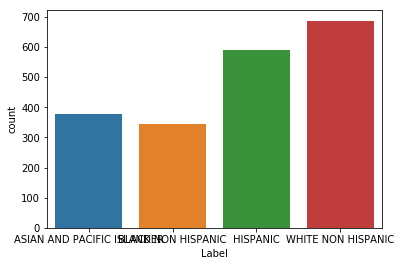

In [12]:
sns.countplot(results_df['ethcty'])
plt.xlabel('Label')

plt.title('')
plt.show()

Text(0.5, 1.0, '')

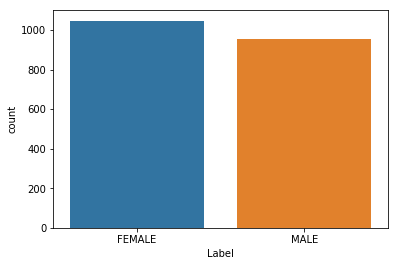

In [13]:
sns.countplot(results_df['gndr'])
plt.xlabel('Label')
plt.title('')

#### Feature Engineering

In [14]:
from sklearn.preprocessing import LabelEncoder
results_df['gndr']=LabelEncoder().fit_transform(results_df['gndr'])

results_df['ethcty']=LabelEncoder().fit_transform(results_df['ethcty'])


In [15]:
from sklearn.model_selection import train_test_split


In [16]:
results_df_train,results_df_test = train_test_split(results_df, test_size=0.8)
results_df_train.head()

,cnt,ethcty,gndr,nm,rnk
1630,14,2,1,Jean,87
671,159,3,0,Miriam,11
688,82,3,0,Abigail,26
1821,31,3,1,Paul,78
1612,16,2,1,Charles,85


In [17]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import  VectorAssembler
from pyspark.ml.feature import Normalizer
from pyspark.sql.functions import *
from pyspark import SparkContext
from pyspark.sql.types import *
import pyspark.ml


In [18]:
Indexer=StringIndexer(inputCol="ethcty", outputCol="etnicity")

In [19]:
features=VectorAssembler(inputCols=['rnk','cnt'], outputCol="features")

In [20]:
normalizer=Normalizer(inputCol="features", outputCol="features_norm")

In [21]:
from pyspark.ml.classification import LogisticRegression

In [22]:
lr=LogisticRegression(maxIter=10,regParam=0.2, elasticNetParam=0.8)

#### Model Definition

In [23]:
from pyspark.ml import Pipeline

In [24]:
pipeline=Pipeline(stages=[Indexer,features,normalizer,lr])

 ###### Not running Model, because of this is Jupyter Notebook without Spark, and will get an Attribute Error

In [ ]:
model=pipeline.fit(results_df_train)

In [ ]:
prediction=model.transform(results_df_train)

#### Evaluation

In [ ]:
from pyspark.ml.evaluation import MultiClassificationEvaluator

In [ ]:
eval=MultiClassificationEvaluator().setMetricName('accuracy').setLabelCol('etnicity').setPredictionCol('prediction')

In [ ]:
eval.evaluate(prediction)

In [ ]:
model=pipeline.fit(results_df_test)
prediction=model.transform(results_df_test)
eval.evaluate(prediction)